In [229]:
def seasonal_index_cal(data_frame):
    upper=data_frame.max()
    lower=data_frame.min()
    s_index_col=((data_frame-lower)/(upper - lower))*100
    data_frame['SI']=s_index_col.mean(axis=1,skipna=True)

    upper_SI=data_frame['SI'].max()
    lower_SI=data_frame['SI'].min()
    data_frame['SI']=((data_frame['SI']-lower_SI)/(upper_SI - lower_SI))*100
    
    return data_frame

def create_sprd(dataframe1, dataframe2):
   
    dataframe1.reset_index(inplace=True)
    dataframe2.reset_index(inplace=True)
    date=dataframe1['Date']
    
    dataframe1.drop(columns=['Date'],inplace=True)
    dataframe2.drop(columns=['Date'],inplace=True)
    
    while True:
        sprd_type=int(raw_input('Please indicate if this is a 1) Crack or 2) Spread - please input integer 1 or 2: '))
        
        if sprd_type==1:
            
            new_df=dataframe1*42-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            
            return new_df
            break
        
        elif sprd_type==2:
            
            new_df= dataframe1-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            
            return new_df
            break
        
        else:
            print 'You have inputted incorrectly. Please try again and enter either integer 1 or 2.'
    

class Mth_1(object):
    
    def __init__(self):
        pass
        
    def pdt_type1(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='B'
                break
            elif inst==2:
                product='G'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RB'
                break       
            elif inst==5:
                product='CL'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no1(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self,start_mth,start_day,end_mth,end_day,i):

        count=0
        path = os.getcwd()
        
        listing = os.listdir(path)
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string

            start_date=str(int(seasonal_year)+i)+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+j)+'-'+end_mth+'-'+end_day # create end date
            
            #Join a date dataframe and the temp dataframe together
            
            dates=pd.date_range(start_date, end_date) # range of dates for date axis
            dates=dates.strftime('%Y-%m-%d') #make sure no left out dates
            sample_data=np.arange(0,len(dates)) #just sample numbers to create dataframe
    
            dates_dataframe=pd.DataFrame({'Date':dates,'data':sample_data}) # create dates dataframe
            dates_dataframe=dates_dataframe.set_index('Date') # set index as Date to facilitate joining
    
            temp=temp.set_index('Date') # set index as Date to facilitate joining
    
            temp=dates_dataframe.join(temp) # join dataframes together on Date
               
            #filter dates by the start and end date
            temp.reset_index(inplace=True)
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date

            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') # putting date in mm/dd form
            temp=temp.set_index('Date') # putting date back as index
            temp=pd.DataFrame(temp['Settle'],columns=['Settle']) # setting dataframe with date and settle only

    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        #don't need this, i believe
        #Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change', 'Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
            
            

class Mth_2(object):
    
    def __init__(self):
        pass
        
    def pdt_type2(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='B'
                break
            elif inst==2:
                product='G'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RB'
                break       
            elif inst==5:
                product='CL'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no2(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self, start_mth, start_day, end_mth,end_day,i):

        count=0
        path = os.getcwd()

        listing = os.listdir(path)
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string
     
            start_date=str(int(seasonal_year)+i)+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+j)+'-'+end_mth+'-'+end_day # create end date
            
            #Join a date dataframe and the temp dataframe together
            
            dates=pd.date_range(start_date, end_date) # range of dates for date axis
            dates=dates.strftime('%Y-%m-%d') #make sure no left out dates
            sample_data=np.arange(0,len(dates)) #just sample numbers to create dataframe
    
            dates_dataframe=pd.DataFrame({'Date':dates,'data':sample_data}) # create dates dataframe
            dates_dataframe=dates_dataframe.set_index('Date') # set index as Date to facilitate joining
    
            temp=temp.set_index('Date') # set index as Date to facilitate joining
    
            temp=dates_dataframe.join(temp) # join dataframes together on Date
               
            #filter dates by the start and end date
            temp.reset_index(inplace=True)
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date

            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') # putting date in mm/dd form
            temp=temp.set_index('Date') # putting date back as index
            temp=pd.DataFrame(temp['Settle'],columns=['Settle']) # setting dataframe with date and settle only
    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        #Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change','Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
    
    
import numpy as np
import pandas as pd
import os

%matplotlib inline

#user specify instrument and contract month

product1=''
month1=''
product2=''
month2=''

front_mth=Mth_1()
product1 = front_mth.pdt_type1()
month1=front_mth.mth_no1()

back_mth=Mth_2()
product2=back_mth.pdt_type2()
month2=back_mth.mth_no2()

        

Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 4
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 3
Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 5
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 3


In [230]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [231]:
cd $product1

C:\Users\boonsin.teo\Documents\Quandl\RB


In [232]:
cd $month1

C:\Users\boonsin.teo\Documents\Quandl\RB\Mar


In [233]:
start_mth=raw_input('Please input start mth of seasonal period in MM format: ')
start_day=raw_input('Please input start day of seasonal period in DD format: ')
i=int(raw_input('Please input 1 if start mth is the same as contract year and 0 if not: '))
            
end_mth=raw_input('Please input end mth of seasonal period in MM format: ')
end_day=raw_input('Please input end day of seasonal period in DD format: ')
            
j=int(raw_input('Please input 1 if end mth is the same as contract year and 0 if not: '))


front_month=front_mth.dataframe_create(start_mth,start_day,end_mth,end_day,i)

Please input start mth of seasonal period in MM format: 03
Please input start day of seasonal period in DD format: 01
Please input 1 if start mth is the same as contract year and 0 if not: 0
Please input end mth of seasonal period in MM format: 02
Please input end day of seasonal period in DD format: 28
Please input 1 if end mth is the same as contract year and 0 if not: 1


In [234]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\RB


In [235]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [236]:
cd ..

C:\Users\boonsin.teo\Documents


In [237]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [238]:
cd $product2

C:\Users\boonsin.teo\Documents\Quandl\CL


In [239]:
cd $month2

C:\Users\boonsin.teo\Documents\Quandl\CL\Mar


In [240]:
back_month=back_mth.dataframe_create(start_mth, start_day,end_mth,end_day,i)

In [241]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\CL


In [242]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [243]:
cd ..

C:\Users\boonsin.teo\Documents


In [244]:
front_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Date,,,,,,,,,,,,,,,,,,,,,
03/01,NaN,NaN,NaN,NaN,NaN,NaN,0.7165,NaN,NaN,0.9090,...,NaN,NaN,2.0940,2.8226,2.9087,2.5773,NaN,NaN,1.1752,1.5177
03/02,NaN,NaN,NaN,0.5200,NaN,NaN,0.7210,NaN,NaN,0.9020,...,NaN,1.2687,2.1206,2.8459,2.8700,NaN,NaN,1.7000,1.1857,1.4878
03/03,NaN,NaN,0.5500,0.5186,0.4331,0.6818,NaN,NaN,NaN,0.8826,...,2.5300,1.3039,2.1530,2.8325,NaN,NaN,2.6381,1.7399,1.1874,1.5019
03/04,NaN,NaN,0.5611,0.5275,0.4425,NaN,NaN,NaN,NaN,0.9017,...,NaN,1.3616,2.1406,2.8360,NaN,2.5748,2.6002,1.7190,1.2205,NaN
03/05,NaN,0.4998,0.5617,0.5181,0.4400,NaN,0.7287,0.6541,NaN,0.9054,...,2.5466,1.3177,2.1752,NaN,2.8846,2.6119,2.5582,1.6928,NaN,NaN


In [245]:
back_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Date,,,,,,,,,,,,,,,,,,,,,
03/01,17.59,17.02,NaN,NaN,13.43,23.35,25.24,22.13,NaN,31.60,...,NaN,NaN,82.00,103.65,108.11,90.60,NaN,NaN,41.70,55.03
03/02,17.61,NaN,NaN,17.60,13.60,23.35,25.31,NaN,NaN,31.48,...,NaN,50.26,82.80,104.76,106.82,NaN,NaN,60.41,41.61,54.12
03/03,17.78,NaN,19.59,17.56,13.86,23.37,NaN,NaN,27.22,30.99,...,99.49,51.27,83.94,104.91,NaN,NaN,93.42,61.55,41.71,54.73
03/04,NaN,16.88,19.96,17.61,14.07,NaN,NaN,22.17,27.31,31.47,...,96.40,53.15,83.70,105.85,NaN,90.05,92.32,61.04,43.17,NaN
03/05,NaN,16.93,19.87,17.61,14.06,NaN,25.68,22.75,27.48,31.68,...,100.08,52.27,84.96,NaN,106.96,90.70,91.29,60.38,NaN,NaN


In [246]:
Spread_Combi=create_sprd(front_month, back_month)

Please indicate if this is a 1) Crack or 2) Spread - please input integer 1 or 2: 1


In [247]:
Spread_Combi.dropna(axis=0,how='all',inplace=True) # drop rows with all NAs

In [248]:
Spread_Combi.dropna(axis=1,how='all',inplace=True)# drop columns with all NAs

In [249]:
Spread_Combi=seasonal_index_cal(Spread_Combi)

In [250]:
#Spread_Combi['SI_rolling']=Spread_Combi['SI'].rolling(5).mean()
Spread_Combi.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,SI
Date,,,,,,,,,,,,,,,,,,,,,
03/01,4.5176,4.0616,3.5100,4.2400,4.3302,5.2656,4.8530,4.7222,4.729,6.5780,...,3.0254,5.9480,14.8992,14.0554,17.6466,17.3802,10.9900,7.6584,8.7134,0.000000
03/02,4.5176,4.0616,3.5100,4.2400,4.3302,5.2656,4.9720,4.7222,4.729,6.4040,...,3.0254,6.2652,14.7678,13.7200,18.0916,17.3802,10.9900,8.1894,8.3676,1.876943
03/03,4.5176,4.0616,3.5100,4.2212,4.3302,5.2656,4.9254,4.7222,4.729,6.0792,...,3.4938,6.4860,14.0550,14.1932,18.0916,17.3802,11.5258,8.1608,8.3498,3.048850
03/04,4.5176,4.0616,3.6062,4.5450,4.5150,5.4280,4.9254,4.7222,4.729,6.4014,...,4.0372,6.2052,13.2620,14.1932,18.0916,16.8884,11.1580,8.0910,8.5354,7.040143
03/05,4.5176,4.0616,3.7214,4.1502,4.4200,5.4280,4.9254,4.7222,4.729,6.3468,...,3.0734,6.3984,11.5474,14.1932,18.9998,16.1544,10.7176,8.6490,8.5354,1.011581


Please input the contract year seasonal index to overlay overall seasonal index with: 2018


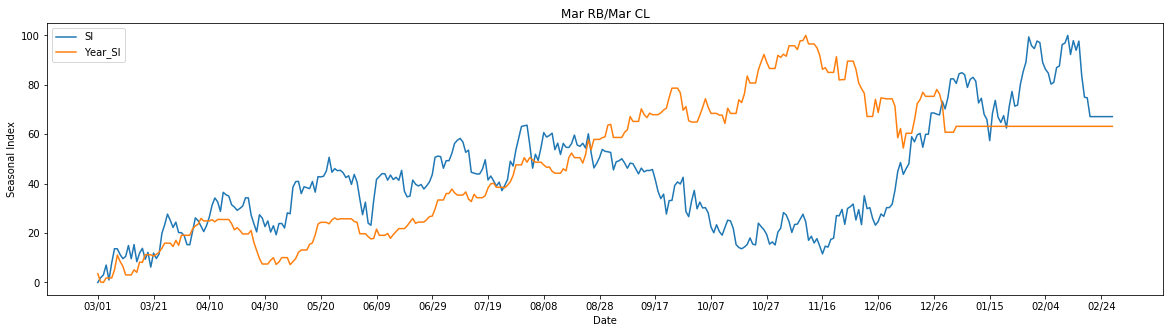

In [252]:

#plot on line chart
year_str=raw_input('Please input the contract year seasonal index to overlay overall seasonal index with: ')

Spread_Combi['Year_SI']=((Spread_Combi[year_str]-Spread_Combi[year_str].min())/(Spread_Combi[year_str].max()-Spread_Combi[year_str].min()))*100

ax=Spread_Combi.plot.line(y=['SI','Year_SI'],figsize=(20,5),xticks=[x for x in range(0,len(Spread_Combi),20)],title=month1+" "+product1+"/" + month2+" "+product2)
ax.set_xlabel('Date')
ax.set_ylabel('Seasonal Index')
ax.legend(loc=2)



In [253]:
pwd

u'C:\\Users\\boonsin.teo\\Documents'